In [2]:
"""
grafo.py

Matemática Discreta - IMAT
ICAI, Universidad Pontificia Comillas

Grupo: GP02A
Integrantes:
    - JAVIER ESCOBAR SERRANO
    - ENRIQUE FERNÁNDEZ-BAILLO RODRIÍGUEZ DE TEMBLEQUE

Descripción:
Librería para la creación y análisis de grafos dirigidos y no dirigidos.
"""

from typing import List,Tuple,Dict
import networkx as nx
import sys

import heapq #Librería para la creación de colas de prioridad

INFTY=sys.float_info.max #Distincia "infinita" entre nodos de un grafo

class Grafo:
    """
    Clase que almacena un grafo dirigido o no dirigido y proporciona herramientas
    para su análisis.
    """

    def __init__(self,dirigido:bool=False):
        """ Crea un grafo dirigido o no dirigido.
        
        Args:
            dirigido (bool): Flag que indica si el grafo es dirigido (verdadero) o no (falso).

        Returns:
            Grafo o grafo dirigido (según lo indicado por el flag)
            inicializado sin vértices ni aristas.
        """

        # Flag que indica si el grafo es dirigido o no.
        self.dirigido=dirigido


        """
        Diccionario que almacena la lista de adyacencia del grafo.
        adyacencia[u]:  diccionario cuyas claves son la adyacencia de u
        adyacencia[u][v]:   Contenido de la arista (u,v), es decir, par (a,w) formado
                            por el objeto almacenado en la arista "a" (object) y su peso "w" (float).
        """
        self.adyacencia:Dict[object,Dict[object,Tuple[object,float]]]={}


    #### Operaciones básicas del TAD ####
    def es_dirigido(self)->bool:
        """ Indica si el grafo es dirigido o no
        
        Args: None
        Returns: True si el grafo es dirigido, False si no.
        Raises: None
        """
        return self.dirigido
    
    def agregar_vertice(self,v:object)->None:
        """ Agrega el vértice v al grafo.
        
        Args:
            v (object): vértice que se quiere agregar. Debe ser "hashable".
        Returns: None
        Raises:
            TypeError: Si el objeto no es "hashable".
        """
        if v not in self.adyacencia:
            self.adyacencia[v]={}

    def agregar_arista(self,s:object,t:object,data:object=None,weight:float=1)->None:
        """ Si los objetos s y t son vértices del grafo, agrega
        una arista al grafo que va desde el vértice s hasta el vértice t
        y le asocia los datos "data" y el peso weight.
        En caso contrario, no hace nada.
        
        Args:
            s (object): vértice de origen (source).
            t (object): vértice de destino (target).
            data (object, opcional): datos de la arista. Por defecto, None.
            weight (float, opcional): peso de la arista. Por defecto, 1.
        Returns: None
        Raises:
            TypeError: Si s o t no son "hashable".
        """
        if (s in self.adyacencia) and (t in self.adyacencia):
            self.adyacencia[s][t]=(data,weight)
            if not self.dirigido:
                self.adyacencia[t][s]=(data,weight)
    
    def eliminar_vertice(self,v:object)->None:
        """ Si el objeto v es un vértice del grafo lo elimiina.
        Si no, no hace nada.
        
        Args:
            v (object): vértice que se quiere eliminar.
        Returns: None
        Raises:
            TypeError: Si v no es "hashable".
        """
        if v in self.adyacencia:
            del self.adyacencia[v]
            for u in self.adyacencia:
                if v in self.adyacencia[u]:
                    del self.adyacencia[u][v]

    def eliminar_arista(self,s:object,t:object)->None:
        """ Si los objetos s y t son vértices del grafo y existe
        una arista de u a v la elimina.
        Si no, no hace nada.
        
        Args:
            s: vértice de origen de la arista (source).
            t: vértice de destino de la arista (target).
        Returns: None
        Raises:
            TypeError: Si s o t no son "hashable".
        """
        if s in self.adyacencia and t in self.adyacencia[s]:
            del self.adyacencia[s][t]
            if not self.dirigido:
                del self.adyacencia[t][s]
    
    def obtener_arista(self,s:object,t:object)->Tuple[object,float] or None:
        """ Si los objetos s y t son vértices del grafo y existe
        una arista de u a v, devuelve sus datos y su peso en una tupla.
        Si no, devuelve None
        
        Args:
            s: vértice de origen de la arista (source).
            t: vértice de destino de la arista (target).
        Returns:
            Tuple[object,float]: Una tupla (a,w) con los datos "a" de la arista (s,t) y su peso
                "w" si la arista existe.
            None: Si la arista (s,t) no existe en el grafo.
        Raises:
            TypeError: Si s o t no son "hashable".
        """
        if s in self.adyacencia and t in self.adyacencia[s]:
            return self.adyacencia[s][t]
        else:
            return None

    def lista_vertices(self)->List[object]:
        """ Devuelve una lista con los vértices del grafo.
        
        Args: None
        Returns:
            List[object]: Una lista [v1,v2,...,vn] de los vértices del grafo.
        Raises: None
        """
        return list(self.adyacencia.keys())

    def lista_adyacencia(self,u:object)->List[object] or None:
        """ Si el objeto u es un vértice del grafo, devuelve
        su lista de adyacencia, es decir, una lista [v1,...,vn] con los vértices
        tales que (u,v1), (u,v2),..., (u,vn) son aristas del grafo.
        Si no, devuelve None.
        
        Args: u vértice del grafo
        Returns:
            List[object]: Una lista [v1,v2,...,vn] de los vértices del grafo
                adyacentes a u si u es un vértice del grafo
            None: si u no es un vértice del grafo
        Raises:
            TypeError: Si u no es "hashable".
        """
        if u in self.adyacencia:
            return list(self.adyacencia[u].keys())


    #### Grados de vértices ####
    def grado_saliente(self,v:object)-> int or None:
        """ Si el objeto v es un vértice del grafo, devuelve
        su grado saliente, es decir, el número de aristas que parten de v.
        Si no, devuelve None.
        
        Args:
            v (object): vértice del grafo
        Returns:
            int: El grado saliente de u si el vértice existe
            None: Si el vértice no existe.
        Raises:
            TypeError: Si u no es "hashable".
        """
        if v in self.adyacencia:
            return len(self.adyacencia[v])
        else:
            return 0

    def grado_entrante(self,v:object)->int or None:
        """ Si el objeto v es un vértice del grafo, devuelve
        su grado entrante, es decir, el número de aristas que llegan a v.
        Si no, devuelve None.
        
        Args:
            v (object): vértice del grafo
        Returns:
            int: El grado entrante de u si el vértice existe
            None: Si el vértice no existe.
        Raises:
            TypeError: Si v no es "hashable".
        """
        if v in self.adyacencia:
            if self.dirigido:
                return sum([1 for u in self.adyacencia if v in self.adyacencia[u]])
            else:
                return len(self.adyacencia[v])
        else:
            return 0

    def grado(self,v:object)->int or None:
        """ Si el objeto v es un vértice del grafo, devuelve
        su grado si el grafo no es dirigido y su grado saliente si
        es dirigido.
        Si no pertenece al grafo, devuelve None.
        
        Args:
            v (object): vértice del grafo
        Returns:
            int: El grado grado o grado saliente de u según corresponda
                si el vértice existe
            None: Si el vértice no existe.
        Raises:
            TypeError: Si v no es "hashable".
        """
        if v in self.adyacencia:
            if self.dirigido:
                return self.grado_saliente(v)
            else:
                return len(self.adyacencia[v])
        else:
            return 0
        
    #### NetworkX ####
    def convertir_a_NetworkX(self)-> nx.Graph or nx.DiGraph:
        """ Construye un grafo o digrafo de Networkx según corresponda
        a partir de los datos del grafo actual.
        
        Args: None
        Returns:
            networkx.Graph: Objeto Graph de NetworkX si el grafo es no dirigido.
            networkx.DiGraph: Objeto DiGraph si el grafo es dirigido.
            En ambos casos, los vértices y las aristas son los contenidos en el grafo dado.
        Raises: None
        """
        nodos = self.lista_vertices()
        
        if self.dirigido:
            G = nx.DiGraph()
            G.add_nodes_from(nodos)
            for u in self.adyacencia.keys():
                for v in self.adyacencia[u].keys():
                    G.add_edge(u,v)
        else:
            G = nx.Graph()
            G.add_nodes_from(nodos)
            for u in self.adyacencia.keys():
                for v in self.adyacencia[u].keys():
                    if (u,v) not in G.edges():
                        G.add_edge(u,v)
        return G

    def dijkstra(self,origen:object)-> Dict[object,object]:
        """ Calcula un Árbol de Caminos Mínimos para el grafo partiendo
        del vértice "origen" usando el algoritmo de Dijkstra. Calcula únicamente
        el árbol de la componente conexa que contiene a "origen".
        
        Args:
            origen (object): vértice del grafo de origen
        Returns:
            Dict[object,object]: Devuelve un diccionario que indica, para cada vértice alcanzable
                desde "origen", qué vértice es su padre en el árbol de caminos mínimos.
        Raises:
            TypeError: Si origen no es "hashable".
        Example:
            Si G.dijkstra(1)={2:1, 3:2, 4:1} entonces 1 es padre de 2 y de 4 y 2 es padre de 3.
            En particular, un camino mínimo desde 1 hasta 3 sería 1->2->3.
        """
        if origen not in self.adyacencia:
            return {}
        else:
            padre = {}
            distancia = {}
            visitado = {}
            for vertice in self.adyacencia:
                padre[vertice] = None
                distancia[vertice] = INFTY
                visitado[vertice] = False
            distancia[origen] = 0
            cola = []
            heapq.heappush(cola, (distancia[origen], origen))
            while len(cola) > 0:
                dv, v = heapq.heappop(cola)
                if not visitado[v]:
                    visitado[v] = True
                    ady_v = self.adyacencia[v]
                    for x in ady_v:
                        if distancia[x] > dv + ady_v[x][1]:
                            distancia[x] = dv + ady_v[x][1]
                            padre[x] = v
                            heapq.heappush(cola, (distancia[x], x))
            del padre[origen]
            return padre
    
    def camino_minimo(self,origen:object,destino:object)->List[object]:
        """ Calcula el camino mínimo desde el vértice origen hasta el vértice
        destino utilizando el algoritmo de Dijkstra.
        
        Args:
            origen (object): vértice del grafo de origen
            destino (object): vértice del grafo de destino
        Returns:
            List[object]: Devuelve una lista con los vértices del grafo por los que pasa
                el camino más corto entre el origen y el destino. El primer elemento de
                la lista es origen y el último destino.
        Example:
            Si G.dijksra(1,4)=[1,5,2,4] entonces el camino más corto en G entre 1 y 4 es 1->5->2->4.
        Raises:
            TypeError: Si origen o destino no son "hashable".
        """
        arbol_dijkstra = self.dijkstra(origen)
        if arbol_dijkstra == {} or destino not in arbol_dijkstra:
            return []
        else:
            camino = []
            nodo = destino
            while nodo != origen:
                camino.append(nodo)
                nodo = arbol_dijkstra[nodo]
            camino.append(origen)
            camino.reverse()
            return camino
        
    def prim(self)-> Dict[object,object]:
        """ Calcula un Árbol Abarcador Mínimo para el grafo
        usando el algoritmo de Prim.
        
        Args: None
        Returns:
            Dict[object,object]: Devuelve un diccionario que indica, para cada vértice del
                grafo, qué vértice es su padre en el árbol abarcador mínimo.
        Raises: None
        Example:
            Si G.prim()={2:1, 3:2, 4:1} entonces en un árbol abarcador mínimo tenemos que:
                1 es padre de 2 y de 4
                2 es padre de 3
        """
        padre = {}
        coste_minimo = {}
        visitado = {}
        cola = []
        for vertice in self.adyacencia:
            padre[vertice] = None
            coste_minimo[vertice] = INFTY
            visitado[vertice] = False
            heapq.heappush(cola, (coste_minimo[vertice], vertice))
        
        while len(cola) > 0:
            _, v = heapq.heappop(cola)
            if not visitado[v]:
                visitado[v] = True
                ady_v = self.adyacencia[v]
                for x in ady_v:
                    if not visitado[x] and coste_minimo[x] > ady_v[x][1]:
                        coste_minimo[x] = ady_v[x][1]
                        padre[x] = v
                        heapq.heappush(cola, (coste_minimo[x], x))
        lista_keys = list(padre.keys())
        
        for key in lista_keys:
            if padre[key] == None:
                del padre[key]

        return padre
    
    def kruskal(self)-> List[Tuple[object,object]]:
        """ Calcula un Árbol Abarcador Mínimo para el grafo
        usando el algoritmo de Kruskal.
        
        Args: None
        Returns:
            List[Tuple[object,object]]: Devuelve una lista [(s1,t1),(s2,t2),...,(sn,tn)]
                de los pares de vértices del grafo que forman las aristas
                del arbol abarcador mínimo.
        Raises: None
        Example:
            En el ejemplo anterior en que G.kruskal()={2:1, 3:2, 4:1} podríamos tener, por ejemplo,
            G.prim=[(1,2),(1,4),(3,2)]
        """
        aristas = {}
        for u in self.adyacencia:
            for v in self.adyacencia[u]:
                if (u,v) not in aristas and (v,u) not in aristas:
                    aristas[(u,v)] = self.adyacencia[u][v][1]
        lista_aristas = list(aristas.keys())
        lista_aristas.sort(key=lambda x: aristas[x])
        aristas_aam = []

        coste = {}
        for vertice in self.adyacencia:
            coste[vertice] = [vertice]
        
        while lista_aristas != []:
            a = lista_aristas.pop(0)
            u, v = a[0], a[1]
            if coste[u] != coste[v]:
                aristas_aam.append(a)
                coste[u] += coste[v]
                for vertice in coste[v]:
                    coste[vertice] = coste[u]
        
        return aristas_aam

{(1, 2): Text(-0.3902381959769147, 0.7804086874481466, '2'),
 (1, 3): Text(-0.6190716277391979, 0.6990160439189199, '4'),
 (2, 1): Text(-0.3902381959769147, 0.7804086874481466, '2'),
 (2, 3): Text(-0.3486202647500143, 0.47942473136706654, '1'),
 (2, 4): Text(0.17341624574958886, 0.41299778135869913, '7'),
 (2, 5): Text(-0.04894109861425401, 0.19280327765341043, '3'),
 (3, 1): Text(-0.6190716277391979, 0.6990160439189199, '4'),
 (3, 2): Text(-0.3486202647500143, 0.47942473136706654, '1'),
 (3, 5): Text(-0.2777745303765372, 0.11141063412418376, '5'),
 (4, 2): Text(0.17341624574958886, 0.41299778135869913, '7'),
 (4, 5): Text(0.24426198012306588, 0.0449836841158163, '2'),
 (4, 6): Text(0.5669635509257704, -0.02502354774347923, '1'),
 (5, 2): Text(-0.04894109861425401, 0.19280327765341043, '3'),
 (5, 3): Text(-0.2777745303765372, 0.11141063412418376, '5'),
 (5, 4): Text(0.24426198012306588, 0.0449836841158163, '2'),
 (5, 6): Text(0.34460620656192753, -0.2452180514487679, '6'),
 (5, 7): Tex

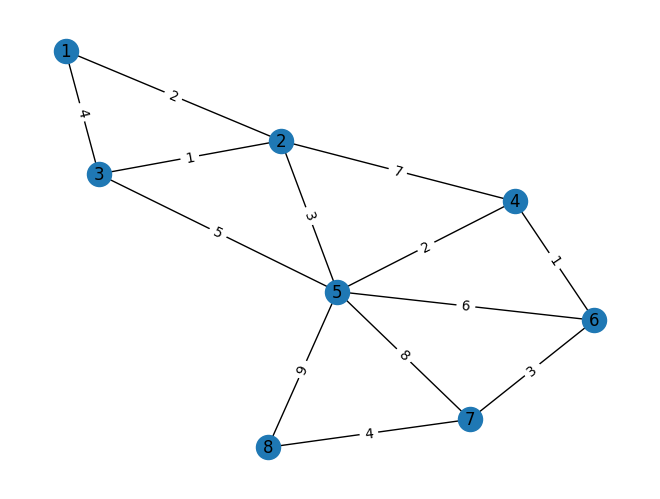

In [3]:
grafo = Grafo()

# Agregar vértices
for i in range(1, 9):
    grafo.agregar_vertice(i)

# Agregar aristas con pesos
grafo.agregar_arista(1, 2, weight=2)
grafo.agregar_arista(1, 3, weight=4)
grafo.agregar_arista(2, 3, weight=1)
grafo.agregar_arista(2, 4, weight=7)
grafo.agregar_arista(2, 5, weight=3)
grafo.agregar_arista(3, 5, weight=5)
grafo.agregar_arista(4, 5, weight=2)
grafo.agregar_arista(4, 6, weight=1)
grafo.agregar_arista(5, 6, weight=6)
grafo.agregar_arista(5, 7, weight=8)
grafo.agregar_arista(5, 8, weight=9)
grafo.agregar_arista(6, 7, weight=3)
grafo.agregar_arista(7, 8, weight=4)
G = grafo.convertir_a_NetworkX()
pos=nx.spring_layout(G)
edge_labels = {}
for vertice in grafo.lista_vertices():
    for adyacente in grafo.lista_adyacencia(vertice):
        edge_labels[(vertice,adyacente)] = grafo.obtener_arista(vertice,adyacente)[1]
nx.draw(G,pos,with_labels=True)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

In [4]:
grafo = Grafo()

# Agregar vértices
for i in range(1, 9):
    grafo.agregar_vertice(i)

# Agregar aristas con pesos
grafo.agregar_arista(1, 2, weight=2)
grafo.agregar_arista(1, 3, weight=4)
grafo.agregar_arista(2, 3, weight=1)
grafo.agregar_arista(2, 4, weight=7)
grafo.agregar_arista(2, 5, weight=3)
grafo.agregar_arista(3, 5, weight=5)
grafo.agregar_arista(4, 5, weight=2)
grafo.agregar_arista(4, 6, weight=1)
grafo.agregar_arista(5, 6, weight=6)
grafo.agregar_arista(5, 7, weight=8)
grafo.agregar_arista(5, 8, weight=9)
grafo.agregar_arista(6, 7, weight=3)
grafo.agregar_arista(7, 8, weight=4)
poya = grafo.dijkstra(1)
print(poya)
bueno = grafo.camino_minimo(1,8)
print(bueno)
buenopues = grafo.prim()
print(buenopues)

{2: 1, 3: 2, 4: 5, 5: 2, 6: 4, 7: 6, 8: 5}
[1, 2, 5, 8]
{2: 1, 3: 2, 4: 5, 5: 2, 6: 4, 7: 6, 8: 7}


{(1, 2): Text(0.17316779477093808, 0.9308664695184827, '1'),
 (1, 3): Text(0.27223496280835535, 0.4300286436416807, '4'),
 (2, 1): Text(0.17316779477093808, 0.9308664695184827, '1'),
 (2, 3): Text(-0.09937777991263456, 0.499162174123198, '2'),
 (3, 1): Text(0.27223496280835535, 0.4300286436416807, '4'),
 (3, 2): Text(-0.09937777991263456, 0.499162174123198, '2'),
 (3, 4): Text(-0.2713274035844399, -0.43149627985207417, '3'),
 (3, 5): Text(0.09800430287589326, -0.5002080155432103, '5'),
 (4, 3): Text(-0.2713274035844399, -0.43149627985207417, '3'),
 (4, 5): Text(-0.17301248883332937, -0.9300286436416805, '1'),
 (5, 4): Text(-0.17301248883332937, -0.9300286436416805, '1'),
 (5, 3): Text(0.09800430287589326, -0.5002080155432103, '5')}

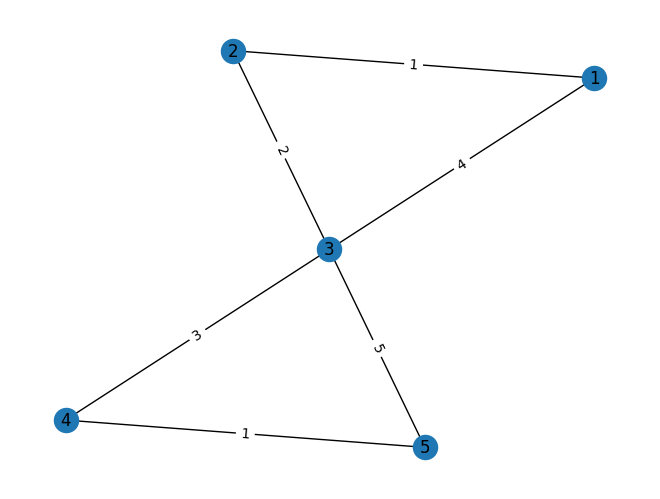

In [5]:
grafo = Grafo()
grafo.agregar_vertice(1)
grafo.agregar_vertice(2)
grafo.agregar_vertice(3)
grafo.agregar_vertice(4)
grafo.agregar_vertice(5)
grafo.agregar_arista(1,2,weight=1)
grafo.agregar_arista(1,3,weight=4)
grafo.agregar_arista(2,3,weight=2)
grafo.agregar_arista(3,4,weight=3)
grafo.agregar_arista(4,5,weight=1)
grafo.agregar_arista(3,5,weight=5)
poya = grafo.dijkstra(1)
poya
G = grafo.convertir_a_NetworkX()
pos=nx.spring_layout(G)
edge_labels = {}
for vertice in grafo.lista_vertices():
    for adyacente in grafo.lista_adyacencia(vertice):
        edge_labels[(vertice,adyacente)] = grafo.obtener_arista(vertice,adyacente)[1]
nx.draw(G,pos,with_labels=True)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

In [6]:
grafo = Grafo()
grafo.agregar_vertice(1)
grafo.agregar_vertice(2)
grafo.agregar_vertice(3)
grafo.agregar_vertice(4)
grafo.agregar_vertice(5)
grafo.agregar_arista(1,2,weight=1)
grafo.agregar_arista(1,3,weight=4)
grafo.agregar_arista(2,3,weight=2)
grafo.agregar_arista(3,4,weight=3)
grafo.agregar_arista(4,5,weight=1)
grafo.agregar_arista(3,5,weight=5)
print(grafo.dijkstra(3))
print(grafo.prim())
print(grafo.kruskal())

{1: 2, 2: 3, 4: 3, 5: 4}
{2: 1, 3: 2, 4: 3, 5: 4}
[(1, 2), (4, 5), (2, 3), (3, 4)]
